In [2]:
%load_ext watermark
%watermark

Last updated: 2023-08-26T15:29:36.969741-06:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.12.2

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.2.0-27-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 6
Architecture: 64bit



In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

In [27]:
insurance = pd.read_csv("/home/carlostr/curso_data_science-master/archive/insurance.csv",
                   usecols=['bmi','children','age','charges','smoker'])
                  

In [28]:
insurance = pd.DataFrame.fillna(insurance, 0)

In [30]:
insurance.replace('yes', 1, inplace=True)
insurance.replace('no', 0, inplace=True)


In [31]:
insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [7]:
insurance.shape

(1338, 4)

In [34]:
nombre_variable_dependiente = 'charges'
nombre_variable_independiente = ['bmi','children','age','smoker']

In [39]:
modelo = LinearRegression()
modelo.fit(X=insurance[nombre_variable_independiente], y=insurance[nombre_variable_dependiente])
insurance['charges_pred'] = modelo.predict(insurance[nombre_variable_independiente])

In [49]:
modelol1 = Lasso()
modelol1.fit(X=insurance[nombre_variable_independiente], y=insurance[nombre_variable_dependiente])
insurance['charges_pred_l1'] = modelol1.predict(insurance[nombre_variable_independiente])

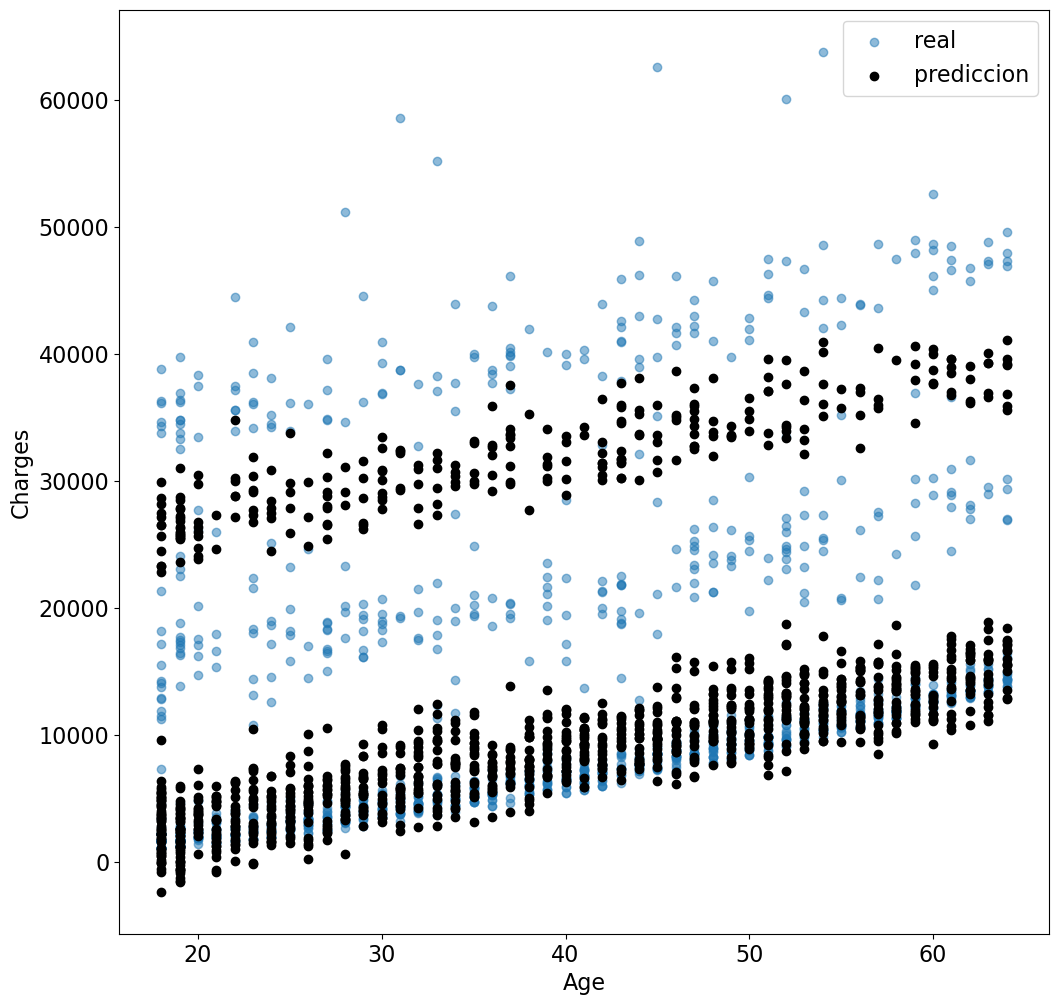

In [40]:
plt.scatter(insurance.age, insurance.charges, alpha=0.5, label="real")
plt.scatter(insurance.age,insurance.charges_pred, c="black", label="prediccion")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend();

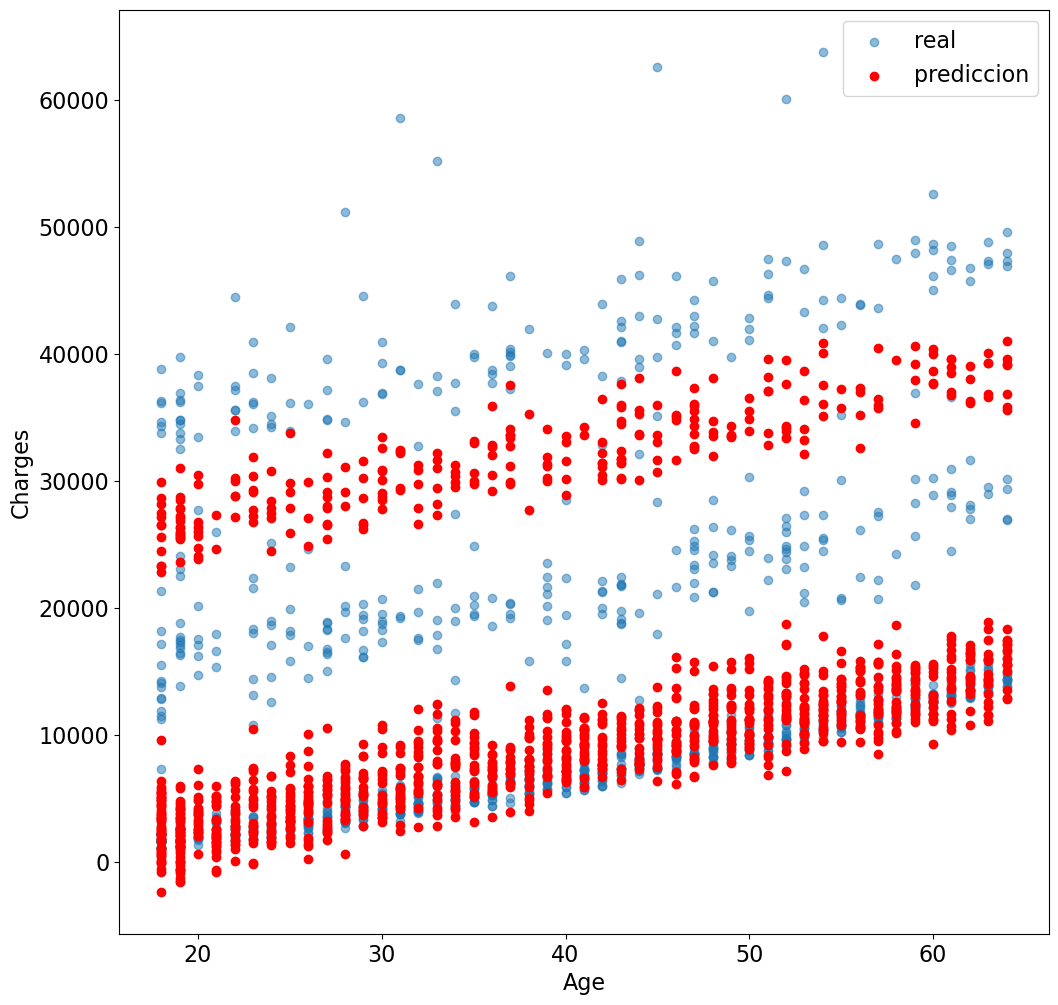

In [51]:
plt.scatter(insurance.age, insurance.charges, alpha=0.5, label="real")
plt.scatter(insurance.age,insurance.charges_pred_l1, c="red", label="prediccion")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend();

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def rmse_cv(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y,y_pred))

def evaluar_modelo(modelo, X, y):
    return cross_val_score(
        estimator = modelo,
        X=X,
        y=y,
        scoring=rmse_cv,
        cv=5
    ).mean()

# Calcular RMSE con validacion cruzada

In [45]:
evaluar_modelo(modelo,X,y)

11252.563127049385

In [52]:
evaluar_modelo(modelol1,X,y)

11252.565364013852